In [68]:
%matplotlib notebook

import numpy as np
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

plt.rcParams.update({'font.size': 20}) # update the font size for our plots to be size 18

In [67]:
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

In [66]:
# open the land cover raster and read the data
with rio.open('data_files/ni_dtm.tif') as dataset:
    xmin, ymin, xmax, ymax = dataset.bounds 
    crs = dataset.crs
    dtm = dataset.read(1)
    affine_tfm = dataset.transform

In [35]:
# Read points from shapefile
pts = gpd.read_file('data_files/radonNI.shp')
pts = pts[['x', 'y', 'class', 'geometry']]
pts.index = range(len(pts))
coords = [(x,y) for x, y in zip(pts.x, pts.y)]

# Open the raster and store metadata
src = rio.open('data_files/ni_dtm.tif')

# Sample the raster at every point location and store values in DataFrame
pts['Value'] = [x[0] for x in src.sample(coords)]

In [36]:
zip(pts.geometry.x, pts.geometry.y)

In [37]:
pts['Value']

0          0
1          0
2          0
3          0
4          0
        ... 
14715    122
14716      0
14717      0
14718      0
14719      0
Name: Value, Length: 14720, dtype: int64

In [38]:
pts.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [39]:
pts.to_file('data_files/radonLCM.shp')

In [40]:
radon_lcm = gpd.read_file('data_files/radonLCM.shp')

In [41]:
radon_lcm

,x,y,class,Value,geometry
0,310500,453500,1,0,POINT (310500.000 453500.000)
1,311500,453500,1,0,POINT (311500.000 453500.000)
2,312500,453500,1,0,POINT (312500.000 453500.000)
3,309500,452500,2,0,POINT (309500.000 452500.000)
4,310500,452500,2,0,POINT (310500.000 452500.000)
...,...,...,...,...,...
14715,327500,310500,5,122,POINT (327500.000 310500.000)
14716,328500,310500,4,0,POINT (328500.000 310500.000)
14717,329500,310500,4,0,POINT (329500.000 310500.000)
14718,326500,309500,4,0,POINT (326500.000 309500.000)


In [11]:
radon_lcm1 = radon_lcm[radon_lcm['Raster Val'] != 127]

In [12]:
radon_lcm1

,x,y,class,Raster Val,geometry
5,311500,452500,2,10.0,POINT (311500.000 452500.000)
6,312500,452500,2,10.0,POINT (312500.000 452500.000)
8,314500,452500,2,10.0,POINT (314500.000 452500.000)
12,309500,451500,1,10.0,POINT (309500.000 451500.000)
13,310500,451500,2,10.0,POINT (310500.000 451500.000)
...,...,...,...,...,...
14686,325500,312500,5,18.0,POINT (325500.000 312500.000)
14687,326500,312500,5,3.0,POINT (326500.000 312500.000)
14688,327500,312500,6,3.0,POINT (327500.000 312500.000)
14689,328500,312500,6,3.0,POINT (328500.000 312500.000)


In [42]:
radon_lcm.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [44]:
radon_lcm.to_file('data_files/radonLCM1.shp')

In [45]:
radon_lcm = gpd.read_file('data_files/radonLCM1.shp')

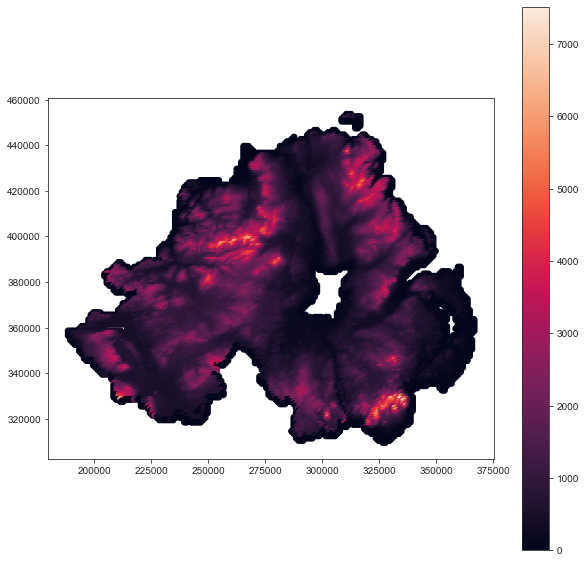

In [47]:
radon_lcm.plot('Value', legend=True, figsize=(10, 10));

<AxesSubplot:xlabel='class', ylabel='Value'>

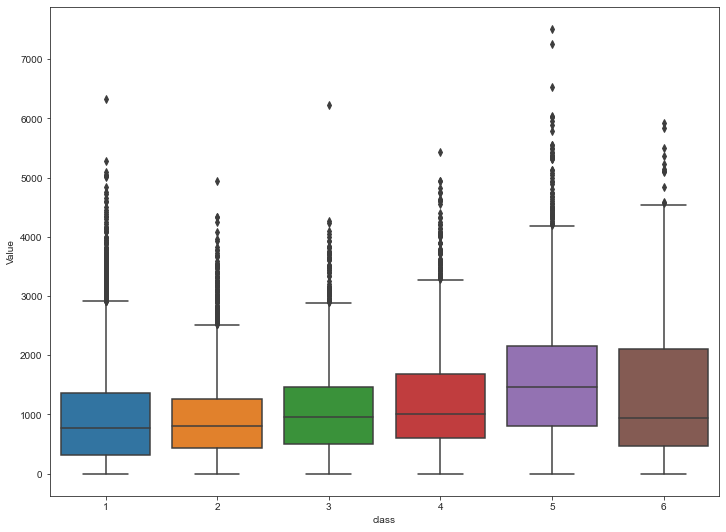

In [49]:
import seaborn as sns

# distribution of various classes within the counties. Every county contian the 6 classess, except County LONDONDERRY
# adapted from: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# set the size of the graph
fig.set_size_inches(12, 9)
sns.boxplot(x = "class", y = "Value", data = radon_lcm)

In [51]:
radon_lcm['Value'].describe()

count    14720.000000
mean      1139.348845
std        935.912038
min          0.000000
25%        467.750000
50%        932.500000
75%       1599.000000
max       7515.000000
Name: Value, dtype: float64

In [56]:
radon_lcm.groupby('class')['Value'].mean()

class
1    1006.031701
2     950.794862
3    1085.328947
4    1213.928324
5    1603.001926
6    1418.330000
Name: Value, dtype: float64

In [65]:
DTM_mean=radon_lcm.groupby("class").mean().sort_values(by = "Value", ascending = False)
DTM_mean

,x,y,Value
class,,,
5,265557.294174,368956.427540,1603.001926
6,292583.333333,344150.000000,1418.330000
4,258623.614958,364056.440443,1213.928324
3,278087.171053,358404.605263,1085.328947
1,305618.378812,392035.112360,1006.031701
2,292103.324518,368635.247450,950.794862
